# matplotlib版数据可视化作业

## 准备

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy

## 练习1：航班乘客变化分析 (2个题)

1. 分析年度乘客总量的变化情况（提示：折线图）
2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

In [2]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


#### Answer-1:

Text(0, 0.5, 'number')

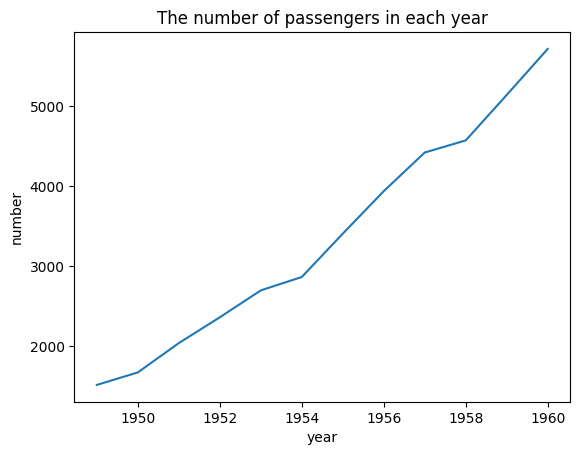

In [3]:
df = data[['year', 'passengers']].groupby(['year']).sum().reset_index() # 取出有用的两列，按照年份分组然后求每年的乘客总数
x_data = df['year']         # X轴数据
y_data = df['passengers']   # Y轴数据

plt.plot(x_data, y_data)                             # 画图
plt.title('The number of passengers in each year')   # 标题
plt.xlabel('year')                                   # x label
plt.ylabel('number')                                 # y label

#### Answer-2:

Text(0, 0.5, 'number')

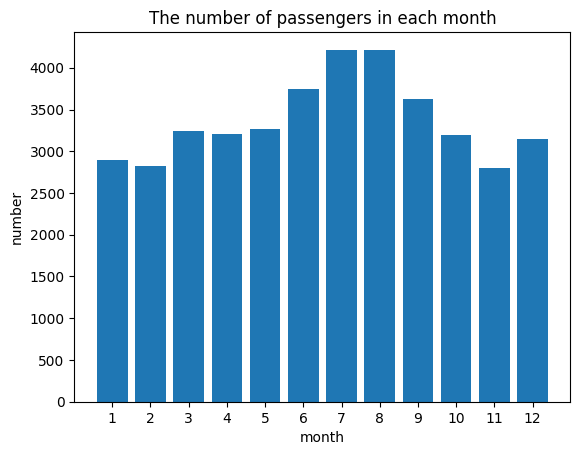

In [4]:
df = data[['month', 'passengers']].groupby(['month'], observed=False).sum().reset_index() # 取出有用的两列，按照月份分组然后求每年的乘客总数
x_data = ['1','2','3','4','5','6','7','8','9','10','11','12']         # X轴数据
y_data = df['passengers']   # Y轴数据

plt.bar(x_data, y_data)                             # 画图
plt.title('The number of passengers in each month')   # 标题
plt.xlabel('month')                                   # x label
plt.ylabel('number')                                 # y label

## 练习2：鸢尾花花型尺寸分析 (3个题)

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

In [5]:
data = sns.load_dataset("iris")
data.head() # 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Answer-1

Text(0, 0.5, 'p_w')

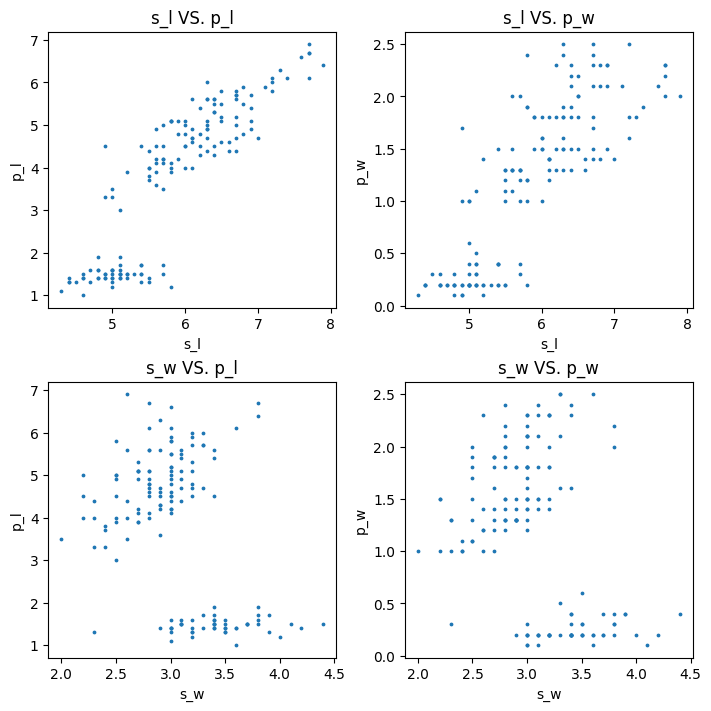

In [6]:
# 分组画图
fig,axs = plt.subplots(2,2, figsize=(7,7), sharex=False, sharey=False, layout="constrained")

axs[0][0].scatter(x=data['sepal_length'], y=data['petal_length'], s=3)
axs[0][0].set_title('s_l VS. p_l')
axs[0][0].set_xlabel('s_l')
axs[0][0].set_ylabel('p_l')

axs[0][1].scatter(x=data['sepal_length'], y=data['petal_width'], s=3)
axs[0][1].set_title('s_l VS. p_w')
axs[0][1].set_xlabel('s_l')
axs[0][1].set_ylabel('p_w')

axs[1][0].scatter(x=data['sepal_width'], y=data['petal_length'], s=3)
axs[1][0].set_title('s_w VS. p_l')
axs[1][0].set_xlabel('s_w')
axs[1][0].set_ylabel('p_l')

axs[1][1].scatter(x=data['sepal_width'], y=data['petal_width'], s=3)
axs[1][1].set_title('s_w VS. p_w')
axs[1][1].set_xlabel('s_w')
axs[1][1].set_ylabel('p_w')

#### Answer-2

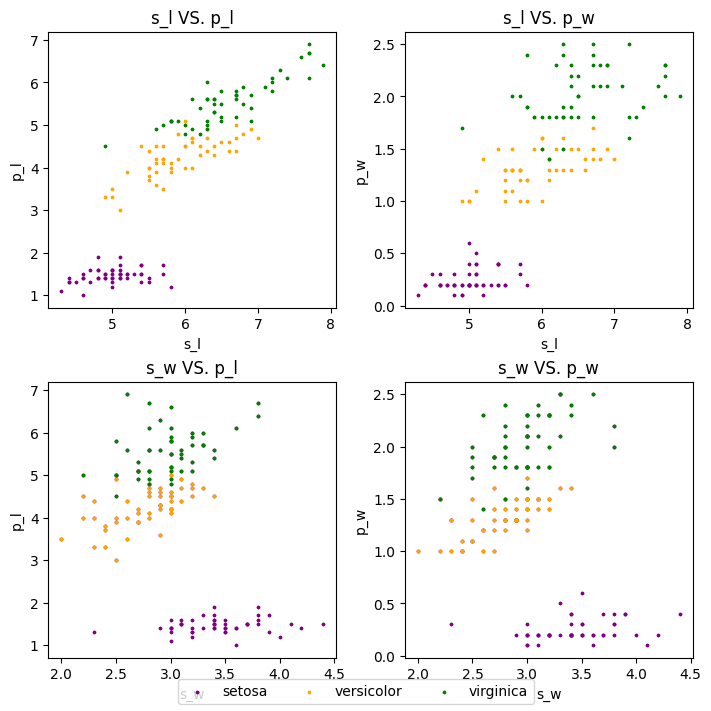

In [7]:
# 先将data按种类不同拆分成三个不同的DataFrame
df_setosa = data.loc[data["species"].str.contains('setosa')]               
df_versicolor = data.loc[data["species"].str.contains('versicolor')]
df_virginica = data.loc[data["species"].str.contains('virginica')]

# 画图
fig,axs = plt.subplots(2,2, figsize=(7,7), sharex=False, sharey=False, layout="constrained")

axs[0][0].scatter(x=df_setosa['sepal_length'], y=df_setosa['petal_length'], s=3, color='purple',)
axs[0][0].scatter(x=df_versicolor['sepal_length'], y=df_versicolor['petal_length'], s=3, color='orange')
axs[0][0].scatter(x=df_virginica['sepal_length'], y=df_virginica['petal_length'], s=3, color='green')
axs[0][0].set_title('s_l VS. p_l')
axs[0][0].set_xlabel('s_l')
axs[0][0].set_ylabel('p_l')

axs[0][1].scatter(x=df_setosa['sepal_length'], y=df_setosa['petal_width'], s=3, color='purple')
axs[0][1].scatter(x=df_versicolor['sepal_length'], y=df_versicolor['petal_width'], s=3, color='orange')
axs[0][1].scatter(x=df_virginica['sepal_length'], y=df_virginica['petal_width'], s=3, color='green')
axs[0][1].set_title('s_l VS. p_w')
axs[0][1].set_xlabel('s_l')
axs[0][1].set_ylabel('p_w')

axs[1][0].scatter(x=data['sepal_width'], y=data['petal_length'], s=3, color='purple')
axs[1][0].scatter(x=df_versicolor['sepal_width'], y=df_versicolor['petal_length'], s=3, color='orange')
axs[1][0].scatter(x=df_virginica['sepal_width'], y=df_virginica['petal_length'], s=3, color='green')
axs[1][0].set_title('s_w VS. p_l')
axs[1][0].set_xlabel('s_w')
axs[1][0].set_ylabel('p_l')

axs[1][1].scatter(x=data['sepal_width'], y=data['petal_width'], s=3, color='purple')
axs[1][1].scatter(x=df_versicolor['sepal_width'], y=df_versicolor['petal_width'], s=3, color='orange')
axs[1][1].scatter(x=df_virginica['sepal_width'], y=df_virginica['petal_width'], s=3, color='green')
axs[1][1].set_title('s_w VS. p_w')
axs[1][1].set_xlabel('s_w')
axs[1][1].set_ylabel('p_w')

# lines = fig.axes[-1].get_legend_handles_labels()
fig.legend(['setosa','versicolor', 'virginica'], ncol=3, loc='lower center')

#### Answer-3

##### for setosa

Text(0.5, 0, 'setosa')

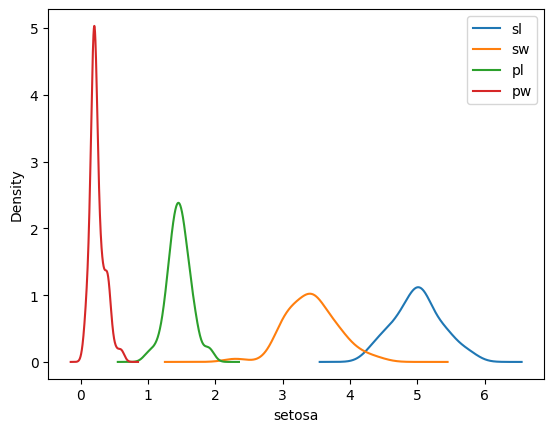

In [8]:
# 先将data按种类不同拆分
setosa_sepal_length = data.sepal_length[data.species == 'setosa']
setosa_sepal_width = data.sepal_width[data.species == 'setosa']
setosa_petal_length = data.petal_length[data.species == 'setosa']
setosa_petal_width = data.petal_width[data.species == 'setosa']

# 画图
setosa_sepal_length.plot(kind='kde', label='sl')
setosa_sepal_width.plot(kind='kde', label='sw')
setosa_petal_length.plot(kind='kde', label='pl')
setosa_petal_width.plot(kind='kde', label='pw')

# 标签
plt.legend()
plt.xlabel('setosa')

##### for versicolor

Text(0.5, 0, 'versicolor')

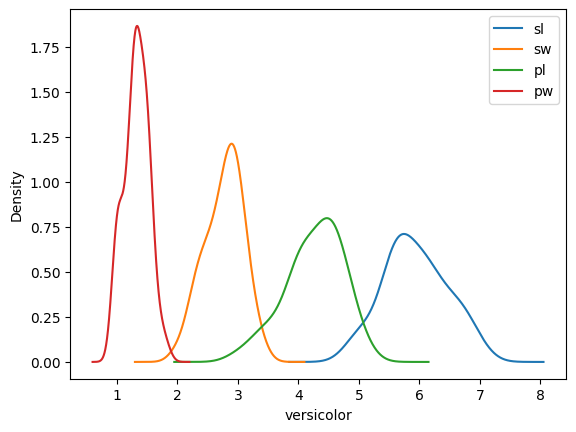

In [9]:
# 先将data按种类不同拆分
versicolor_sepal_length = data.sepal_length[data.species == 'versicolor']
versicolor_sepal_width = data.sepal_width[data.species == 'versicolor']
versicolor_petal_length = data.petal_length[data.species == 'versicolor']
versicolor_petal_width = data.petal_width[data.species == 'versicolor']

# 画图
versicolor_sepal_length.plot(kind='kde', label='sl')
versicolor_sepal_width.plot(kind='kde', label='sw')
versicolor_petal_length.plot(kind='kde', label='pl')
versicolor_petal_width.plot(kind='kde', label='pw')

# 标签
plt.legend()
plt.xlabel('versicolor')

##### for virginica

Text(0.5, 0, 'virginica')

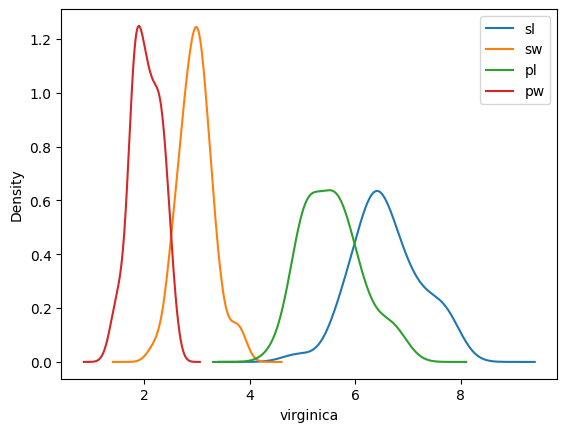

In [10]:
# 先将data按种类不同拆分
virginica_sepal_length = data.sepal_length[data.species == 'virginica']
virginica_sepal_width = data.sepal_width[data.species == 'virginica']
virginica_petal_length = data.petal_length[data.species == 'virginica']
virginica_petal_width = data.petal_width[data.species == 'virginica']

# 画图
virginica_sepal_length.plot(kind='kde', label='sl')
virginica_sepal_width.plot(kind='kde', label='sw')
virginica_petal_length.plot(kind='kde', label='pl')
virginica_petal_width.plot(kind='kde', label='pw')

# 标签
plt.legend()
plt.xlabel('virginica')

## 练习3：餐厅小费情况分析 (7个题)

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

In [11]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Answer-1

In [ ]:
# pip install statsmodels

In [12]:
# 线性回归
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table

x_lm = sm.add_constant(data['total_bill']) # 线性回归增加常数项
y_lm = data['tip']
regr = sm.OLS(y_lm, x_lm) # 普通最小二乘模型（ordinary least square model）
res = regr.fit()

# 从模型获得拟合数据
st, data_regr, ss2 = summary_table(res, alpha=0.05) # 置信水平alpha=5%， st：数据汇总；data_regr：数据详情；ss2：数据列名
fitted_values = data_regr[:,2]

In [13]:
# 置信区间
# 获得5%置信区间的上下界
predict_mean_ci_low, predict_mean_ci_upp = data_regr[:,4:6].T

# 创建置信区间DataFrame，上下界
CI_df = pd.DataFrame(columns=['x_CI_data', 'low_CI', 'upper_CI'])
CI_df['x_CI_data'] = data['total_bill']
CI_df['low_CI'] = predict_mean_ci_low
CI_df['upper_CI'] = predict_mean_ci_upp
CI_df.sort_values('x_CI_data', inplace=True) # 根据x_CI_data进行排序

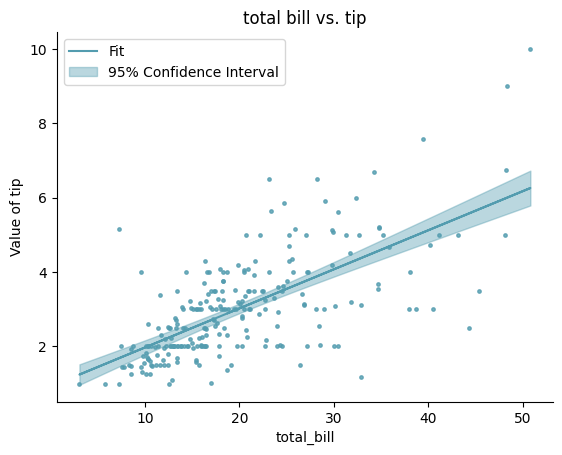

In [14]:
fig, ax = plt.subplots()
# 调用plt句柄画一个图，返回两个变量fig，ax，分别是figure和 axes的缩写。函数返回一个figure图像和一个子图ax的array列表。
# 一个fig图里边会套好几个ax，而每个ax会负责当前坐标上的图。所以任何绘制的图形都是在ax上完成的；
# 而设置整个画布，将是在fig上完成。

# 散点图绘图数据
x_data = data['total_bill']
y_data = data['tip']

# 预测曲线绘图数据
x_regr = data['total_bill']
y_regr = fitted_values

#不显示顶部和右侧的坐标线
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# 绘制散点图跟带置信区间的预测曲线
ax.scatter(x_data, y_data, color = '#539caf', alpha=0.8, s=6) # alpha参数：散点的透明度，取值0（透明）-1（不透明）；s参数：控制点的大小
ax.plot(x_regr, y_regr, color = '#539caf', alpha=1, label='Fit') # 预测曲线
ax.fill_between(CI_df['x_CI_data'], CI_df['low_CI'], CI_df['upper_CI'], color='#539caf', alpha=0.4, label='95% Confidence Interval')
ax.set_xlabel('total_bill')
ax.set_ylabel('Value of tip')
ax.set_title('total bill vs. tip')
ax.legend(loc='best')

#### Answer-2

In [15]:
# 定义箱图绘制函数
def boxplot(x, y, base_color, median_color, x_label, y_label, title):
    """自动处理数据并绘制箱图
    
    :params  x: 作为barplot函数x轴输入的data中列名; y: 作为barplot函数y轴输入的data中列名; base_color & median_color: 颜色参数; x_label & y_label: xy轴标签; title: 图表的标题
    :return: 绘制好的图
    """
    # 绘图数据处理 (这部分只针对餐厅小费这个题目)
    x_data = data[x].unique() # x轴只需要给一个标签，所以将重复值去掉
    df = data[[x, y]].groupby([x], observed=True) # 按x轴标签分组并提取数据
    y_data = [] # 将数据打包成barplot函数能绘图的形式
    for i in range(len(x_data)):
        y_data.append(df.get_group(x_data[i])[y])
    
    _, ax = plt.subplots()

    # 设置样式 (普适)
    ax.boxplot(
        y_data,
        # 箱子是否填充颜色
        patch_artist = True,
        # 中位数颜色
        medianprops = {'color': base_color},
        # 箱子颜色设置：color：边框颜色；facecolor：填充颜色
        boxprops = {'color': base_color, 'facecolor': median_color},
        # 猫须颜色
        whiskerprops = {'color': median_color},
        # 猫须界限颜色
        capprops = {'color': base_color}
    )
    
    # 设置箱图的x与x_data保持一致
    ax.set_xticklabels(x_data)

    # 添加标签和标题
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

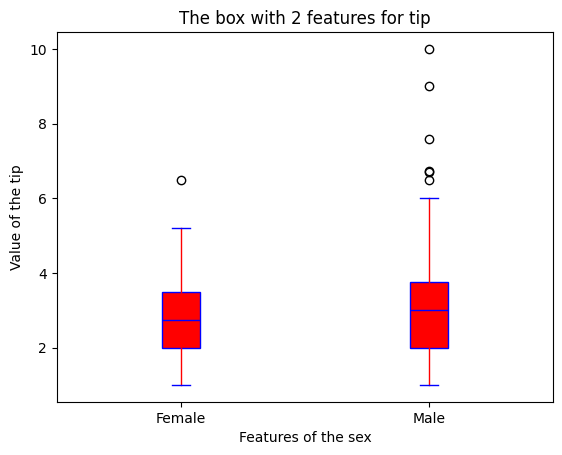

In [16]:
# 绘图
boxplot('sex', 'tip', base_color='b', median_color='r', x_label='Features of the sex', y_label='Value of the tip'
        , title='The box with 2 features for tip')

#### Answer-3

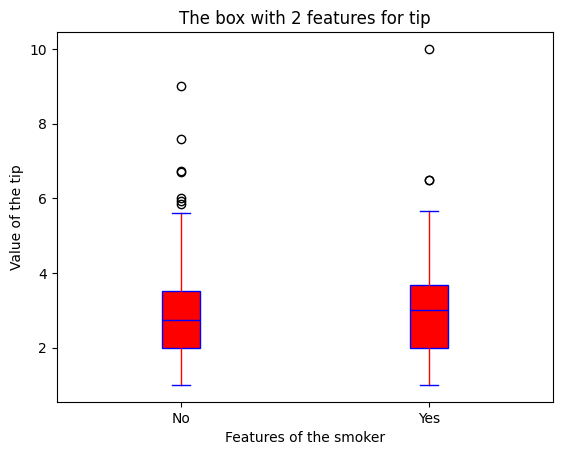

In [17]:
# 绘图
boxplot('smoker', 'tip', base_color='b', median_color='r', x_label='Features of the smoker', y_label='Value of the tip'
        , title='The box with 2 features for tip')

#### Answer-4

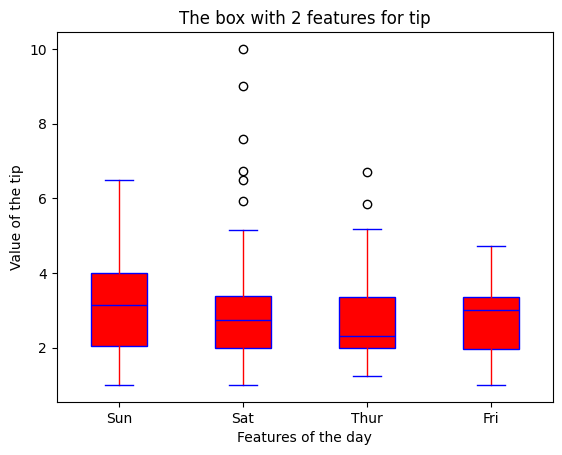

In [18]:
boxplot('day', 'tip', base_color='b', median_color='r', x_label='Features of the day', y_label='Value of the tip'
        , title='The box with 2 features for tip')

#### Answer-5

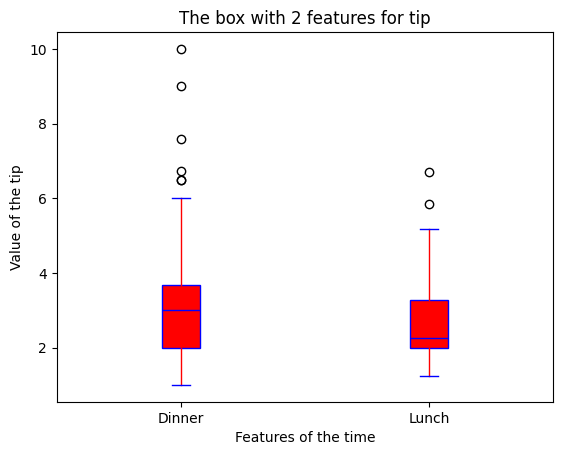

In [19]:
boxplot('time', 'tip', base_color='b', median_color='r', x_label='Features of the time', y_label='Value of the tip'
        , title='The box with 2 features for tip')

#### Answer-6

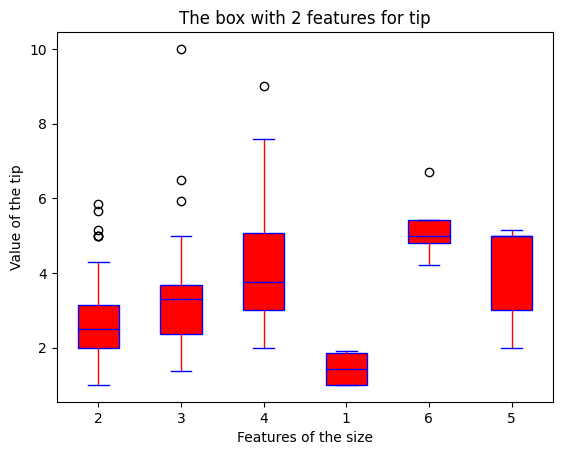

In [20]:
boxplot('size', 'tip', base_color='b', median_color='r', x_label='Features of the size', y_label='Value of the tip'
        , title='The box with 2 features for tip')

#### Answer-7

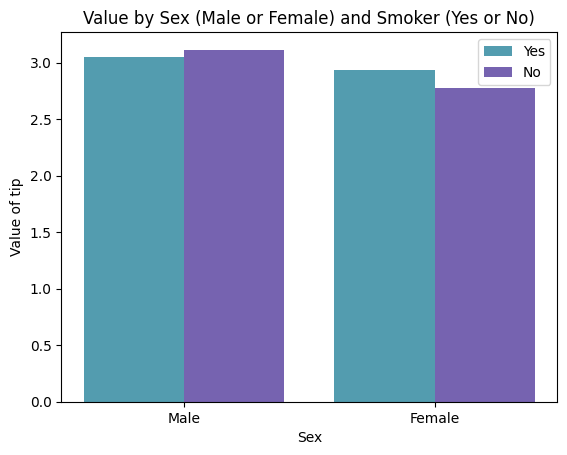

In [21]:
# 绘图数据处理
# 按性别跟是否吸烟将数据分成4组，并计算每组慷慨度（总tip/总人数）
df = data[['sex', 'smoker', 'tip']]
temp_df = df.groupby(['sex', 'smoker'], observed=False).agg('mean').reset_index()
# 分配每个柱子中心的位置
x = [0.8, 1.2, 1.8, 2.2]

for i in range(4):
    data_sex = temp_df['sex'][i]
    data_smoker = temp_df['smoker'][i]
    data_tip = temp_df['tip'][i]

    if data_smoker == 'Yes':
        plt.bar(x[i], data_tip, width=0.4, color='#539caf')
    else:
        plt.bar(x[i], data_tip, width=0.4, color='#7663b0')

# 修饰绘图结果
plt.xlabel('Sex')
plt.ylabel('Value of tip')
plt.title('Value by Sex (Male or Female) and Smoker (Yes or No)')
plt.xticks([1,2], ['Male', 'Female'])
plt.legend(['Yes', 'No'], loc='best')

## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [22]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### Answer-1

In [23]:
def stackedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 循环绘制堆积柱状图
    for i in range(0, len(y_data_list)):
        if i == 0:
            ax.bar(x_data, y_data_list[i], color = colors[i], align = 'center', label = y_data_names[i])
        else:
            # 采用堆积的方式，除了第一个分类，后面的分类都从前一个分类的柱状图接着画
            # 用归一化保证最终累积结果为1，下面bottom参数表示纵向从哪里开始画
            ax.bar(x_data, y_data_list[i], color = colors[i], bottom = y_data_list[i - 1], align = 'center', label = y_data_names[i])
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc='best') # 设定图例位置

In [24]:
# 提取数据并计算每个仓位的总人数
ex_data_pclass = data[['pclass','survived']]
total_pclass_1 = int((ex_data_pclass[['pclass']]==1).sum().iloc[0])
total_pclass_2 = int((ex_data_pclass[['pclass']]==2).sum().iloc[0])
total_pclass_3 = int((ex_data_pclass[['pclass']]==3).sum().iloc[0])

# 将总人数，生还人数，死亡人数，以及它们的比例计算出来并添加的DataFrame中
df = ex_data_pclass.groupby(['pclass']).sum().reset_index()
df.loc[:,"total"] = [total_pclass_1, total_pclass_2, total_pclass_3]
df.loc[:,"unsurvived"] = df['total'].sub(df['survived'])
df.eval('survived_prop = survived / total', inplace=True)
df.eval('unsurvived_prop = 1 - survived_prop', inplace=True)
df.loc[:,"total_prop"]=[1, 1, 1]

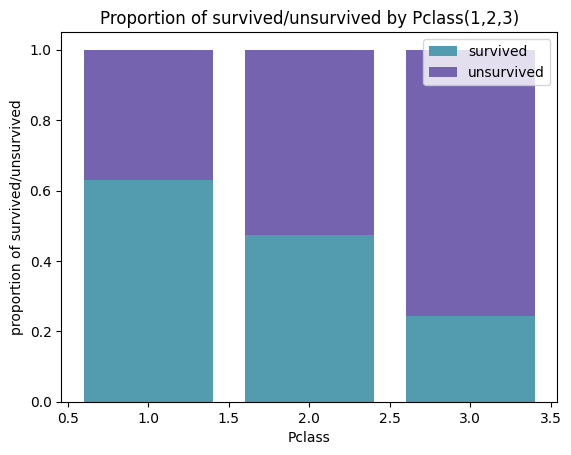

In [25]:
# 绘图
stackedbarplot(
    x_data = df['pclass'], 
    y_data_list = [df['survived_prop'], df['unsurvived_prop']],
    y_data_names = ['survived', 'unsurvived'],
    colors = ['#539caf', '#7663b0'],
    x_label = 'Pclass',
    y_label = 'proportion of survived/unsurvived',
    title = 'Proportion of survived/unsurvived by Pclass(1,2,3)'
)

#### Answer-2

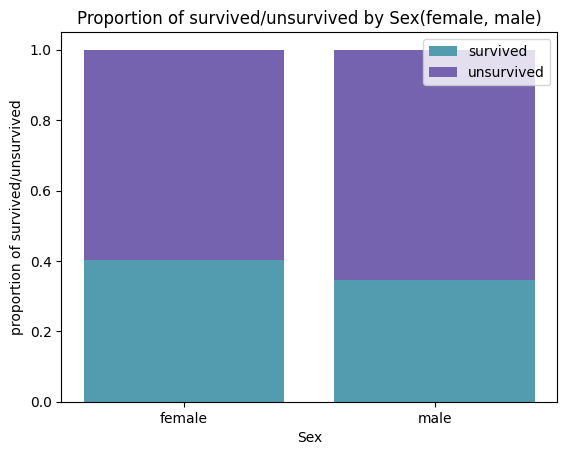

In [26]:
# 提取数据并计算男女各自的总人数
ex_data_sex = data[['sex','survived']]
total_male = int((ex_data_sex[['sex']]=='male').sum().iloc[0])
total_female = int((ex_data_sex[['sex']]=='female').sum().iloc[0])

# 将总人数，生还人数，死亡人数，以及它们的比例计算出来并添加的DataFrame中
df = ex_data_sex.groupby(['sex']).sum().reset_index()
df.loc[:,"total"] = [total_male, total_female]
df.loc[:,"unsurvived"] = df['total'].sub(df['survived'])
df.eval('survived_prop = survived / total', inplace=True)
df.eval('unsurvived_prop = 1 - survived_prop', inplace=True)
df.loc[:,"total_prop"]=[1, 1]

# 绘图
stackedbarplot(
    x_data = df['sex'], 
    y_data_list = [df['survived_prop'], df['unsurvived_prop']],
    y_data_names = ['survived', 'unsurvived'],
    colors = ['#539caf', '#7663b0'],
    x_label = 'Sex',
    y_label = 'proportion of survived/unsurvived',
    title = 'Proportion of survived/unsurvived by Sex(female, male)'
)

#### Answer-3

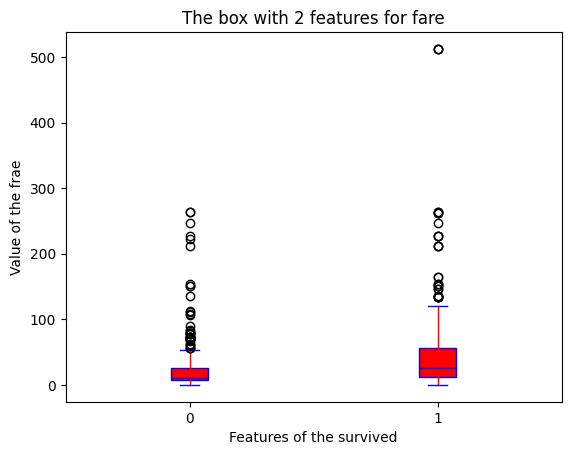

In [27]:
# 绘图
boxplot('survived', 'fare', base_color='b', median_color='r', x_label='Features of the survived', y_label='Value of the frae'
        , title='The box with 2 features for fare')

#### Answer-4

C:\Users\dell\AppData\Local\Temp\ipykernel_24124\1099446695.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(how='any', inplace=True)


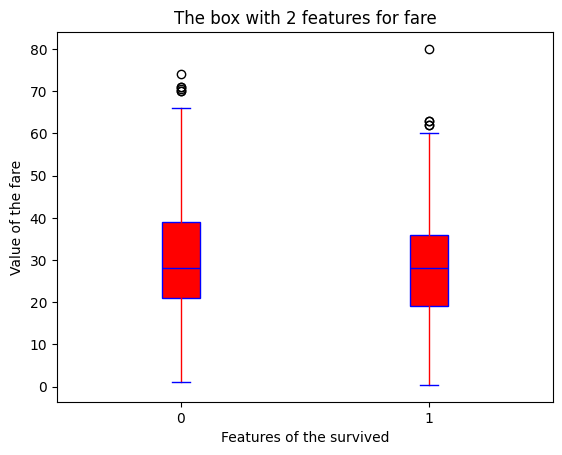

In [28]:
# 数据处理：删除age中的空行
df = data
data = df[['survived', 'age']]
data.dropna(how='any', inplace=True)
# 绘图
boxplot('survived', 'age', base_color='b', median_color='r', x_label='Features of the survived', y_label='Value of the fare'
        , title='The box with 2 features for fare')
data = df

#### Answer-5

([<matplotlib.axis.XTick at 0x22dc66603d0>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

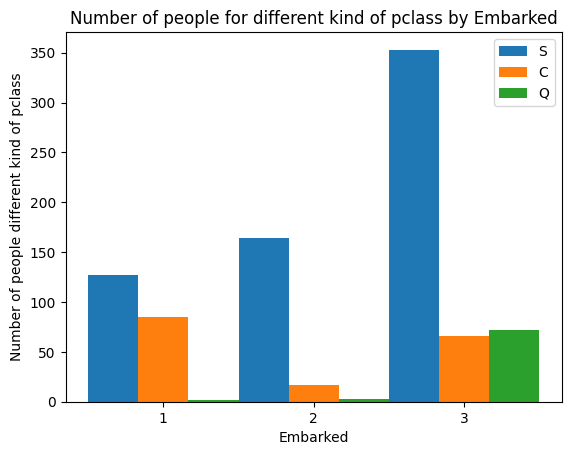

In [29]:
# 抽取数据并分别计算每个港口上船的乘客不同仓位等级的总数
df = data[['embarked', 'pclass']]

# S港口统计
num_S_1 = ((df['pclass']==1) & (df['embarked']=='S')).sum()
num_S_2 = ((df['pclass']==2) & (df['embarked']=='S')).sum()
num_S_3 = ((df['pclass']==3) & (df['embarked']=='S')).sum()
# C港口统计
num_C_1 = ((df['pclass']==1) & (df['embarked']=='C')).sum()
num_C_2 = ((df['pclass']==2) & (df['embarked']=='C')).sum()
num_C_3 = ((df['pclass']==3) & (df['embarked']=='C')).sum()
# Q港口统计
num_Q_1 = ((df['pclass']==1) & (df['embarked']=='Q')).sum()
num_Q_2 = ((df['pclass']==2) & (df['embarked']=='Q')).sum()
num_Q_3 = ((df['pclass']==3) & (df['embarked']=='Q')).sum()

# 构造数据表格
dfS = pd.DataFrame({
    'pclass':[1, 2, 3],
    'S':[num_S_1, num_S_2, num_S_3]
})
dfC = pd.DataFrame({
    'pclass':[1, 2, 3],
    'C':[num_C_1, num_C_2, num_C_3]
})
dfQ = pd.DataFrame({
    'pclass':[1, 2, 3],
    'Q':[num_Q_1, num_Q_2, num_Q_3]
})

# 给定柱子位置
dfS.eval("position = pclass - 1/3 ", inplace=True)
dfC.eval("position = pclass", inplace=True)
dfQ.eval("position = pclass + 1/3", inplace=True)

ax = plt.subplot()
ax.bar(dfS['position'],dfS['S'], width=1/3, label="S")
ax.bar(dfC['position'],dfC['C'], width=1/3, label="C")
ax.bar(dfQ['position'],dfQ['Q'], width=1/3, label="Q")
ax.legend()
plt.xlabel('Embarked')
plt.ylabel('Number of people different kind of pclass')
plt.title('Number of people for different kind of pclass by Embarked')
plt.xticks(np.arange(1, 4, 1))

#### Answer-6

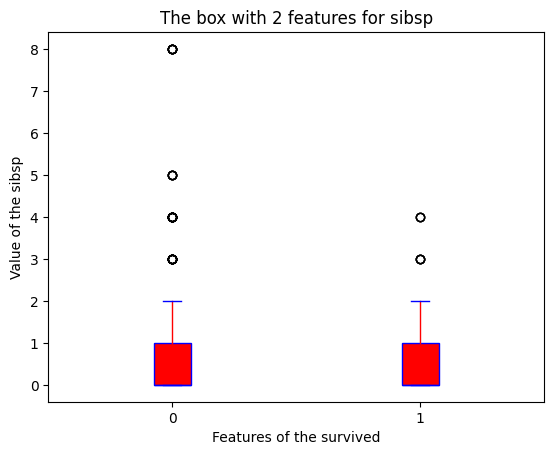

In [30]:
# 绘图
boxplot('survived', 'sibsp', base_color='b', median_color='r', x_label='Features of the survived', y_label='Value of the sibsp'
        , title='The box with 2 features for sibsp')

#### Answer-7

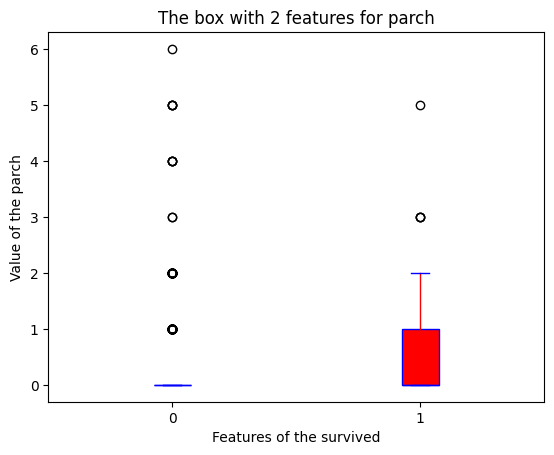

In [31]:
# 绘图
boxplot('survived', 'parch', base_color='b', median_color='r', x_label='Features of the survived', y_label='Value of the parch'
        , title='The box with 2 features for parch')

#### Answer-8

   alone  num  survived
0   True  163         1
1   True  374         0
2  False  179         1
3  False  175         0


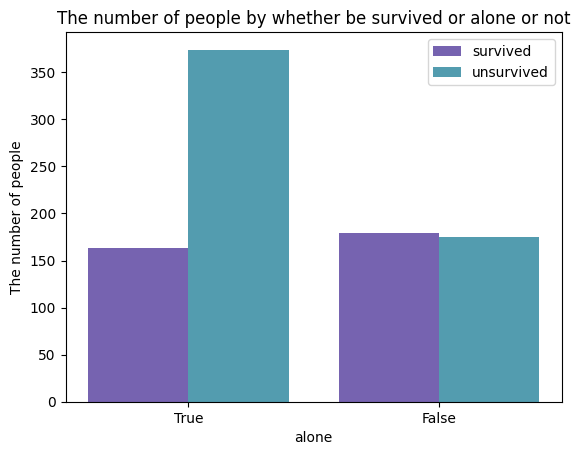

In [32]:
# 数据处理：
# 1.分别统计alone为False和True时对应幸存和遇难人数
df = data[['survived', 'alone']]
num_true_survived = ((df['alone'] == True) & (df['survived'] == 1)).sum()
num_true_unsurvived = ((df['alone'] == True) & (df['survived'] == 0)).sum()
num_false_survived = ((df['alone'] == False) & (df['survived'] == 1)).sum()
num_false_unsurvived = ((df['alone'] == False) & (df['survived'] == 0)).sum()

# 2.将计算的数据做成可直接绘图的DataFrame表格
temp_df = pd.DataFrame({
    'alone': ['True', 'True', 'False', 'False'],
    'num': [num_true_survived, num_true_unsurvived, num_false_survived, num_false_unsurvived],
    'survived': [1, 0, 1, 0]
})
print(temp_df)

# 绘图
x = [0.8, 1.2, 1.8, 2.2]
for i in range(len(temp_df['alone'])):
    if temp_df['survived'][i] == 0:
        cl = '#539caf'
    else:
        cl = '#7663b0'
    plt.bar(x[i], temp_df['num'][i], width=0.4, color=cl)

# 添加标签和标题
plt.xlabel('alone')
plt.ylabel('The number of people')
plt.title('The number of people by whether be survived or alone or not')
plt.xticks([1, 2], ['True', 'False'])
plt.legend(['survived', 'unsurvived'], loc='best')